In [563]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.constants import g
from scipy.stats import zscore
from scipy.integrate import solve_ivp
import warnings

sns.set_style("whitegrid")

warnings.filterwarnings("ignore")

In [564]:
g = 9.81
L = 1000.0
A_deg = 10
A = np.radians(A_deg)
phi = 0
omega = np.sqrt(g / L)

duration = 100
dt = 0.001
t = np.arange(0, duration, dt)

In [565]:
theta = A * np.cos(omega * t + phi)
angular_velocity = -A * omega * np.sin(omega * t + phi)
angular_acceleration = -A * omega ** 2 * np.cos(omega * t + phi)

In [566]:
data = pd.DataFrame({
    "Time (s)": t,
    "Angle (rad)": theta,
    "Angular Velocity (rad/s)": angular_velocity,
    "Angular Acceleration (rad/s²)": angular_acceleration
})

In [567]:
print(f"Loading Data:")
print(data.head())

Loading Data:
   Time (s)  Angle (rad)  Angular Velocity (rad/s)  \
0     0.000     0.174533                 -0.000000   
1     0.001     0.174533                 -0.000002   
2     0.002     0.174533                 -0.000003   
3     0.003     0.174533                 -0.000005   
4     0.004     0.174533                 -0.000007   

   Angular Acceleration (rad/s²)  
0                      -0.001712  
1                      -0.001712  
2                      -0.001712  
3                      -0.001712  
4                      -0.001712  


In [568]:
print(f"\nLoading Information:")
print(data.info())


Loading Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Time (s)                       100000 non-null  float64
 1   Angle (rad)                    100000 non-null  float64
 2   Angular Velocity (rad/s)       100000 non-null  float64
 3   Angular Acceleration (rad/s²)  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None


In [569]:
print(f"\nLength of Dataset: {len(data)}")


Length of Dataset: 100000


In [570]:
print(f"Generated {len(data)} data points")
print(data.describe())

Generated 100000 data points
            Time (s)    Angle (rad)  Angular Velocity (rad/s)  \
count  100000.000000  100000.000000             100000.000000   
mean       49.999500      -0.008132                 -0.003294   
std        28.867658       0.125677                  0.011506   
min         0.000000      -0.174533                 -0.017287   
25%        24.999750      -0.137291                 -0.014079   
50%        49.999500      -0.013938                 -0.005646   
75%        74.999250       0.118382                  0.006440   
max        99.999000       0.174533                  0.017287   

       Angular Acceleration (rad/s²)  
count                  100000.000000  
mean                        0.000080  
std                         0.001233  
min                        -0.001712  
25%                        -0.001161  
50%                         0.000137  
75%                         0.001347  
max                         0.001712  


In [571]:
csv_filename = "../data/raw/pendulum_oscillation_data.csv"
data.to_csv(csv_filename, index=False)
print(f"✅ CSV file '{csv_filename}' saved successfully with {len(data)} rows.")

✅ CSV file '../data/raw/pendulum_oscillation_data.csv' saved successfully with 100000 rows.


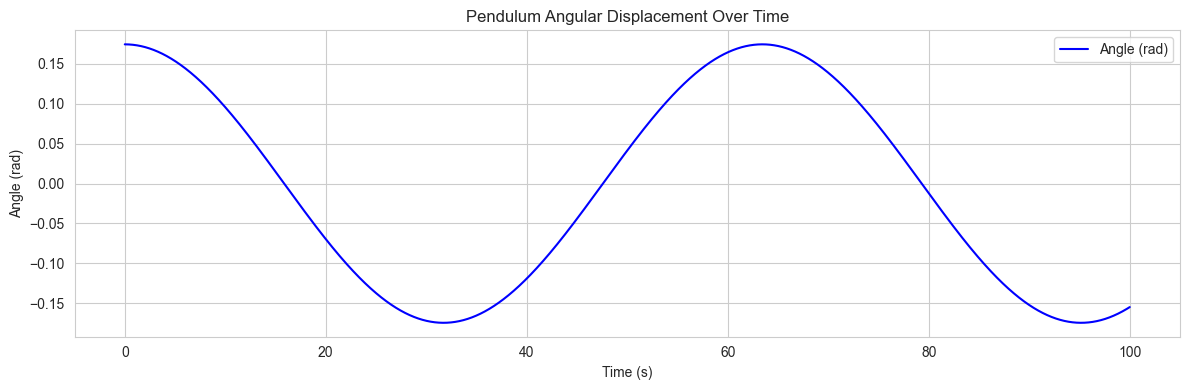

In [572]:
plt.figure(figsize=(12, 4))
plt.plot(data["Time (s)"], data["Angle (rad)"], label="Angle (rad)", color='blue')
plt.title("Pendulum Angular Displacement Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

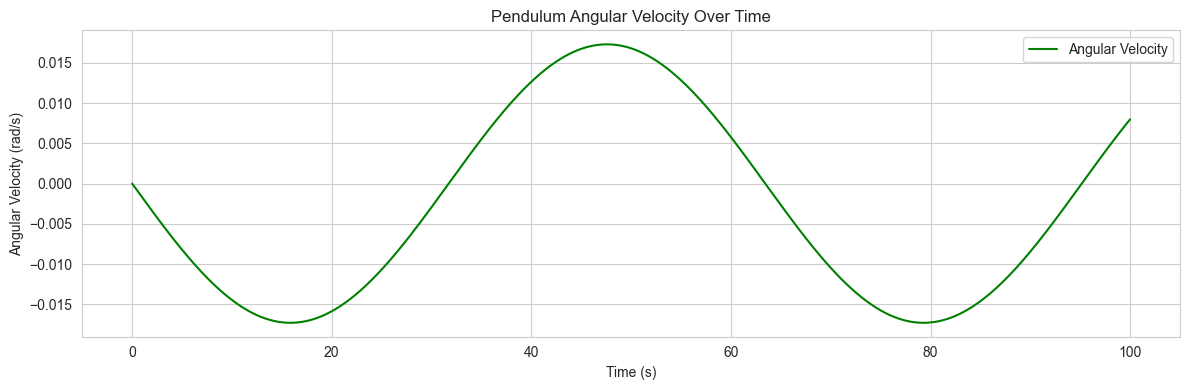

In [573]:
plt.figure(figsize=(12, 4))
plt.plot(data["Time (s)"], data["Angular Velocity (rad/s)"], label="Angular Velocity", color='green')
plt.title("Pendulum Angular Velocity Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

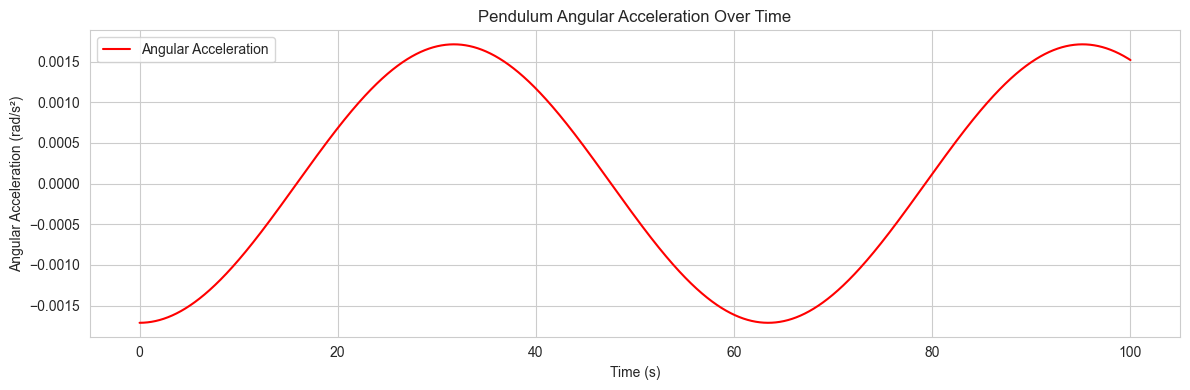

In [574]:
plt.figure(figsize=(12, 4))
plt.plot(data["Time (s)"], data["Angular Acceleration (rad/s²)"], label="Angular Acceleration", color='red')
plt.title("Pendulum Angular Acceleration Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angular Acceleration (rad/s²)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()